In [1]:
import numpy as np
import matplotlib
# matplotlib.rcParams['figure.figsize']=(4,3)
# %matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import GPy

In [2]:
# Import datasets as pandas
# from scipy.io import loadmat
import pandas as pd
# data_set = loadmat("Mark_4sec_CA1PSD_ISO_freqamp_020619.mat")
CA1_df = pd.read_csv("Mark_4sec_CA1PSD_ISO_freqamp_020619.csv")
CA1_df

,Stim_1,Stim_2,Xk0_1,Xk0_2,Xk0_3,Xk0_4,Xk0_5,Xk0_6,Xk0_7,Xk0_8,...,Xk1_91,Xk1_92,Xk1_93,Xk1_94,Xk1_95,Xk1_96,Xk1_97,Xk1_98,Xk1_99,Xk1_100
0,17,30,2.889382e-08,8.228355e-10,3.727805e-10,4.241217e-10,3.835249e-10,1.359495e-10,7.646542e-11,7.230198e-11,...,1.905511e-13,1.772096e-13,2.540316e-13,9.875528e-14,1.503621e-13,1.187669e-13,1.973010e-13,2.227980e-13,1.840703e-13,7.943871e-14
1,42,40,2.946870e-08,2.651098e-10,1.178408e-10,4.392692e-11,4.694084e-11,3.303667e-11,3.519227e-11,3.981263e-11,...,2.301898e-13,2.226828e-13,1.844381e-13,9.489514e-14,1.303267e-13,1.672190e-13,1.932164e-13,2.093461e-13,2.772425e-13,1.951049e-13
2,35,30,3.033540e-08,9.903383e-10,8.237377e-10,5.810566e-10,2.946790e-10,1.872337e-10,1.528366e-10,1.426708e-10,...,1.941317e-13,3.253641e-13,3.292398e-13,1.838587e-13,3.118819e-13,3.222774e-13,2.982563e-13,3.113566e-13,2.968086e-13,1.379729e-13
3,23,50,2.800316e-08,1.405249e-10,7.744954e-11,5.042274e-11,7.967258e-11,7.972625e-11,5.209429e-11,5.965894e-11,...,2.920034e-13,4.410565e-13,6.254435e-13,4.197941e-13,1.453352e-13,2.077807e-13,1.711589e-13,1.964532e-13,3.274727e-13,4.111102e-13
4,42,50,2.951470e-08,9.158716e-10,1.002492e-09,3.851373e-10,1.190141e-10,1.593892e-10,3.091918e-10,1.785465e-10,...,1.522438e-13,1.251475e-13,1.250717e-13,2.574372e-13,2.072287e-13,1.887576e-13,3.401650e-13,2.548371e-13,2.752148e-13,2.036985e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,29,40,2.760391e-08,5.482257e-10,4.152814e-10,3.823512e-10,1.394368e-10,1.306009e-10,3.228872e-10,1.929548e-10,...,1.365177e-13,9.045459e-14,6.317431e-14,1.000605e-13,1.658208e-13,1.455544e-13,1.089338e-13,1.157295e-13,9.619555e-14,9.370679e-14
380,17,50,2.813580e-08,4.598266e-10,3.300581e-10,4.083492e-10,2.354260e-10,1.694233e-10,1.117590e-10,1.376190e-10,...,1.105672e-13,7.664209e-14,7.384185e-14,1.100898e-13,1.351685e-13,5.693625e-14,1.141458e-13,1.047674e-13,9.196161e-14,8.495494e-14
381,42,30,2.869622e-08,7.607811e-10,4.008928e-10,4.830553e-10,4.074416e-10,5.000619e-10,2.710350e-10,1.332286e-10,...,1.723231e-13,1.253901e-13,1.535894e-13,1.723239e-13,1.382617e-13,1.725417e-13,1.785419e-13,1.846773e-13,1.525604e-13,1.311332e-13
382,7,50,2.768996e-08,4.727119e-10,2.493700e-10,3.049506e-10,3.469474e-10,3.886375e-10,1.488559e-10,1.052257e-10,...,9.520196e-14,6.715345e-14,7.916543e-14,1.259009e-13,2.051121e-13,8.416903e-14,7.020470e-14,5.951097e-14,8.133673e-14,7.944941e-14


In [3]:
CA1_df.describe()

,Stim_1,Stim_2,Xk0_1,Xk0_2,Xk0_3,Xk0_4,Xk0_5,Xk0_6,Xk0_7,Xk0_8,...,Xk1_91,Xk1_92,Xk1_93,Xk1_94,Xk1_95,Xk1_96,Xk1_97,Xk1_98,Xk1_99,Xk1_100
count,384.000000,384.000000,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,...,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,21.125000,25.000000,3.006580e-08,6.838802e-10,4.242416e-10,3.325875e-10,2.737854e-10,2.119977e-10,1.660316e-10,1.318236e-10,...,1.642277e-13,1.551898e-13,1.429085e-13,1.437353e-13,1.391482e-13,1.285422e-13,1.252911e-13,1.292104e-13,1.296236e-13,1.204573e-13
std,12.630313,17.100532,2.614463e-08,5.566612e-10,3.014916e-10,2.396455e-10,1.939794e-10,1.458412e-10,1.156664e-10,8.830746e-11,...,1.178856e-13,1.098695e-13,1.121640e-13,9.989423e-14,1.039656e-13,1.127923e-13,1.026353e-13,1.016668e-13,1.050891e-13,9.597760e-14
min,5.000000,0.000000,2.587095e-08,9.917649e-11,4.360904e-11,2.944649e-11,1.911013e-11,1.608183e-11,1.073114e-11,7.456511e-12,...,4.412311e-14,3.014739e-14,2.504564e-14,2.505650e-14,1.791496e-14,2.179438e-14,3.120023e-14,3.205342e-14,3.444288e-14,3.533534e-14
25%,10.000000,10.000000,2.713823e-08,3.064636e-10,1.851726e-10,1.350993e-10,1.055163e-10,8.852281e-11,7.113036e-11,6.074769e-11,...,1.029310e-13,9.272843e-14,8.290598e-14,8.736139e-14,9.155886e-14,7.631374e-14,7.626764e-14,7.942759e-14,8.286357e-14,7.894606e-14
50%,20.000000,25.000000,2.772918e-08,6.142604e-10,3.925562e-10,3.029925e-10,2.435663e-10,1.945367e-10,1.456843e-10,1.262569e-10,...,1.478822e-13,1.376601e-13,1.210754e-13,1.251736e-13,1.260593e-13,1.114552e-13,1.079610e-13,1.143833e-13,1.149826e-13,1.006343e-13
75%,30.500000,40.000000,2.839150e-08,9.265502e-10,5.722245e-10,4.831342e-10,3.899357e-10,2.962307e-10,2.396378e-10,1.819960e-10,...,1.986908e-13,1.872604e-13,1.775699e-13,1.710130e-13,1.663452e-13,1.591248e-13,1.529868e-13,1.555532e-13,1.565489e-13,1.446464e-13
max,42.000000,50.000000,5.088916e-07,6.131808e-09,2.154967e-09,1.463382e-09,9.948709e-10,7.954313e-10,5.683271e-10,4.922672e-10,...,1.937020e-12,1.596251e-12,1.671863e-12,1.472966e-12,1.758082e-12,1.970697e-12,1.765635e-12,1.732637e-12,1.848186e-12,1.656409e-12


In [30]:
# gamma = np.arange(32,51)
# print(gamma)
print(CA1_df.iloc[1, 133:152])

Xk1_32    2.338566e-11
Xk1_33    8.961917e-12
Xk1_34    8.322270e-12
Xk1_35    1.494233e-11
Xk1_36    3.165177e-11
Xk1_37    1.104602e-11
Xk1_38    1.390144e-11
Xk1_39    1.601626e-11
Xk1_40    9.887088e-12
Xk1_41    8.156365e-12
Xk1_42    1.553501e-10
Xk1_43    1.261543e-10
Xk1_44    5.468822e-12
Xk1_45    5.754561e-12
Xk1_46    8.416554e-12
Xk1_47    7.088688e-12
Xk1_48    4.930073e-12
Xk1_49    2.126913e-12
Xk1_50    3.182885e-12
Name: 1, dtype: float64


# Select the gamma freq. stimulations

CA1_df_gamma = CA1_df[CA1_df['Stim_1']>32]
CA1_df_gamma

In [31]:
# calculate mean psd for Xk0 and Xk1
# _, Y = CA1_df_gamma.iloc[:, 2:].mean(axis=1)
# select Kx1_32:50 are column? 
Y = np.mean(CA1_df.iloc[:, 133:152],axis=1)
print(np.shape(Y))
# Y.reset_index(drop=True, inplace=True)
Y_reshape =Y[:, np.newaxis]
print(Y)

(384,)
0      1.787256e-11
1      2.446021e-11
2      2.001850e-11
3      1.296795e-11
4      1.972900e-11
           ...     
379    9.146226e-12
380    7.698385e-12
381    1.234971e-11
382    3.898356e-12
383    9.337085e-12
Length: 384, dtype: float64


 C:\Users\Sina\AppData\Local\Temp/ipykernel_18068/865466885.py:7: FutureWarning:Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [32]:
X = CA1_df.iloc[:, 0:2]
X

,Stim_1,Stim_2
0,17,30
1,42,40
2,35,30
3,23,50
4,42,50
...,...,...
379,29,40
380,17,50
381,42,30
382,7,50


X.reset_index(drop=True, inplace=True)
X

In [33]:
# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

In [34]:
# create simple GP model
m = GPy.models.GPRegression(X,Y_reshape,ker)
display(m)

GP_regression.,value,constraints,priors
sum.Mat52.variance,1.0,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


 C:\Users\Sina\anaconda3\lib\site-packages\GPy\plotting\matplot_dep\plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


GP_regression.,value,constraints,priors
sum.Mat52.variance,1.0,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


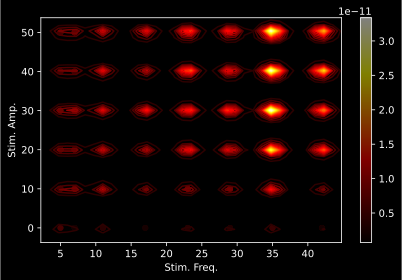

In [35]:
# matplotlib.use("Agg")
GPy.plotting.change_plotting_library("matplotlib")
# GPy.plotting.change_plotting_library('plotly')
fig1 = m.plot(legend=False, xlabel='Stim. Freq.', ylabel='Stim. Amp.',
              label="Mark_4sec_CA1PSD_ISO_freqamp_020619");
display(m);
ax = plt.gca()
PCM = ax.get_children()[0]
plt.colorbar(PCM, ax=ax)

In [36]:
# matplotlib.use("Agg")
GPy.plotting.change_plotting_library("matplotlib")
display(fig1)

{'dataplot': [<matplotlib.collections.PathCollection at 0x21903381460>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x21903f44c40>]}

In [37]:
# optimize and plot
m.optimize(messages=True,max_f_eval = 1000);

GP_regression.,value,constraints,priors
sum.Mat52.variance,4.029323481124352e-18,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,7.896980021044318e-29,+ve,
Gaussian_noise.variance,7.896980021044318e-29,+ve,


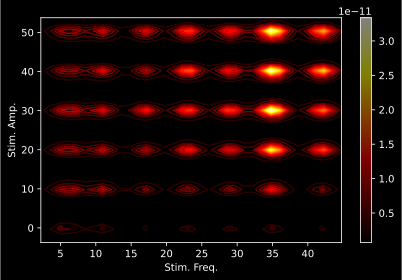

In [39]:
figure = m.plot(legend=False, xlabel='Stim. Freq.' , ylabel='Stim. Amp.');
# display(GPy.plotting.show(figure, filename='basic_gp_regression_notebook_2d'))
display(m)
ax = plt.gca()
PCM = ax.get_children()[0]
plt.colorbar(PCM, ax=ax)
